In [1]:
import os
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')


# Cargar archivo .env
# Ruta relativa desde el notebook hasta el .env
dotenv_path = '../generadores/.env'  #

# Cargar el archivo .env desde la ruta especificada
load_dotenv(dotenv_path=dotenv_path)

# Leer variables de entorno
username = os.getenv("USUARIO_DB")
password = os.getenv("CLAVE_BD")

# Validar que se cargaron bien
print("Usuario:", username)
print("Contraseña cargada:", bool(password))  # No imprime la clave, pero verifica si existe

if not username or not password:
    raise ValueError("Las variables de entorno USUARIO_DB o CLAVE_BD no están definidas")

# Cadena de conexión
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=upgradeserver-vf.database.windows.net;'
    'DATABASE=Banco;'
    f'UID={username};'
    f'PWD={password}'
)

# Conexión
conn = pyodbc.connect(conn_str)



Usuario: vanesa
Contraseña cargada: True


In [2]:
# Consulta de prueba
query_usuarios = "SELECT * FROM usuarios" 
df_usuarios = pd.read_sql(query_usuarios, conn)
df_usuarios.head()

,id,nombre,apellido,estado_civil,dni,nacionalidad,fecha_nacimiento,direccion,codigo_postal,provincia,telefono,email,es_moroso,profesion,salario,numero_cuenta,tipo_cuenta,saldo,antiguedad_cliente,genero
0,1,Isaac,Bas,Soltero,50803891L,Andorrana,1976-08-03,"Acceso de Lupe Alegre 4, Albacete, 49375",04461,Zaragoza,612998046,pepita46@example.net,False,Preparador y elaborador de tabaco y sus productos,2982.68,ES3179968971026971199366,corriente,71063.73,2021-10-30,Masculino
1,2,Sandalio,Fuentes,Divorciado,86252814P,Noruega,1978-05-08,"Cuesta de Teófilo Somoza 3 Puerta 8 , Huelva, ...",05617,Soria,770595376,hcalatayud@example.com,False,"Gerente de sucursales de bancos, de servicios ...",5444.37,ES4882819013135814761921,corriente,59066.89,2020-10-19,Masculino
2,3,Dorita,Tejera,Soltera,89546650Z,Argentina,1962-01-16,"Camino de Danilo Roldan 54 Puerta 7 , La Coruñ...",33705,Cádiz,664201115,julietapi@example.org,False,Peón de jardinería y horticultura,3235.68,ES8896352888935177230208,corriente,69020.29,2020-08-31,Femenino
3,4,Mario,Lopez,Casado,79407181A,Armenia,1958-02-09,"Acceso Cebrián Balaguer 75 Piso 0 , Pontevedra...",51941,Jaén,612845864,rinconirma@example.org,False,Vendedor de quioscos y de puestos de mercado,3592.85,ES8080924363933477280294,corriente,43431.75,2021-06-20,Masculino
4,5,Luciano,Osorio,Divorciado,11417891R,Croata,1987-02-23,"Calle de Obdulia Múñiz 89 Piso 1 , Almería, 37332",27760,Asturias,682543717,ciriaco75@example.net,False,Mecánico y reparador de máquinas agrícolas e i...,1302.73,ES9451266251700653094652,corriente,24346.41,2020-09-10,Masculino


In [3]:
# Consulta de prueba
query_activos = "SELECT * FROM activos_financieros" 
df_activos = pd.read_sql(query_activos, conn)
df_activos.head()

,id,usuario_id,tipo_activo,descripcion,monto
0,1,7,ahorro,Activos financieros,74284.27
1,2,8,ahorro,Activos financieros,14384.02
2,3,7,inversiones,Activos financieros,222459.66
3,4,3,ahorro,Activos financieros,59254.00
4,5,5,ahorro,Activos financieros,9822.68


In [4]:

# Consulta de prueba
query_creditos = "SELECT * FROM creditos" 
df_creditos = pd.read_sql(query_creditos, conn)
df_creditos.head()

,id,usuario_id,monto,fecha_inicio,fecha_fin,estado,tipo
0,1,3479,13158.92,2021-06-27,2021-12-24,Pagado,Automotriz
1,2,9766,27855.84,2021-06-27,2025-06-06,Pagado,Estudiantil
2,3,5687,24341.30,2020-10-02,2022-09-22,Activo,Hipotecario
3,4,6279,48965.73,2022-11-18,2023-11-13,Moroso,Personal
4,5,496,5623.96,2022-08-16,2026-07-26,Pagado,Personal


In [5]:

# Consulta de prueba
query_cuentas = "SELECT * FROM cuentas_bancarias" 
df_cuentas = pd.read_sql(query_cuentas, conn)
df_cuentas.head()

,id,usuario_id,numero_cuenta,tipo_cuenta,saldo
0,1,10,ES7739637164360193114526,ahorro,66755.89
1,2,10,ES1316574526906275603407,empresa,95837.31
2,3,3,ES5865885769854836821457,nómina,42972.24
3,4,4,ES5167158907887819348998,ahorro,899.28
4,5,1,ES4649322614789355112278,nómina,88410.84


In [6]:

# Consulta de prueba
query_monedas = "SELECT * FROM monedas_digitales" 
df_monedas = pd.read_sql(query_monedas, conn)
df_monedas.head()

,id,usuario_id,tipo_moneda,cantidad,valor_actual
0,1,5,ADA,8727.795885,0.79
1,2,7,BTC,1.137435,56869.56
2,3,9,BTC,0.479071,50116.50
3,4,9,XRP,12265.715992,0.30
4,5,4,ETH,8.786425,2443.99


#### EDA

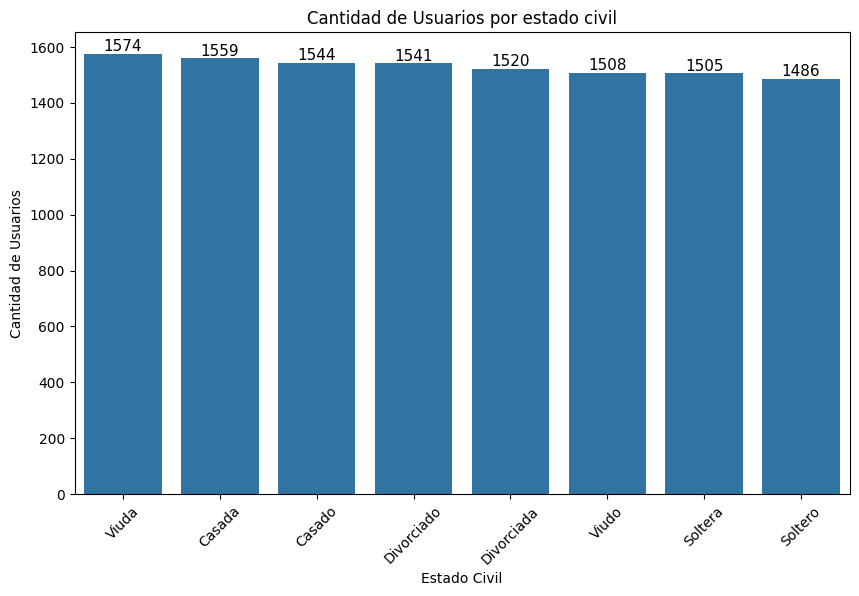

In [7]:
# Consulta para obtener todos los usuarios
query = "SELECT * FROM usuarios"
df_usuarios = pd.read_sql(query, conn)

# Gráfico de barras de la cantidad de usuarios por estado civil
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_usuarios, x='estado_civil', order=df_usuarios['estado_civil'].value_counts().index)
plt.title('Cantidad de Usuarios por estado civil')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=45)

# Añadir etiquetas en las columnas
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=11)

plt.show()

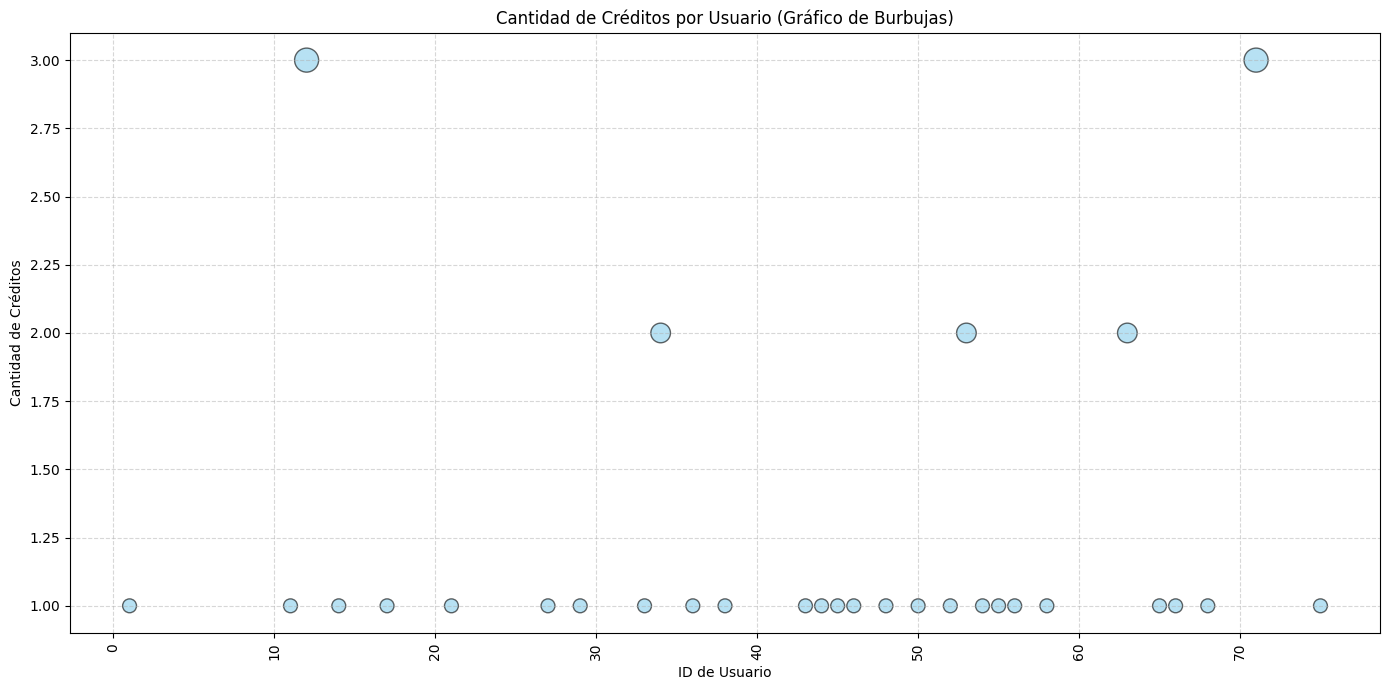

In [8]:
# Obtener todos los créditos
query = "SELECT * FROM creditos"
df_creditos = pd.read_sql(query, conn)

# Agrupar por usuario_id y contar la cantidad de créditos por cada uno
creditos_por_usuario = df_creditos.groupby('usuario_id').size().reset_index(name='creditos')

# Gráfico de burbujas: mostrar solo los primeros 30 usuarios
plt.figure(figsize=(14, 7))
plt.scatter(
    creditos_por_usuario['usuario_id'].head(30),
    creditos_por_usuario['creditos'].head(30),
    s=creditos_por_usuario['creditos'].head(30) * 100,  # tamaño de burbuja
    alpha=0.6,
    color='skyblue',
    edgecolors='k'
)
plt.title('Cantidad de Créditos por Usuario (Gráfico de Burbujas)')
plt.xlabel('ID de Usuario')
plt.ylabel('Cantidad de Créditos')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



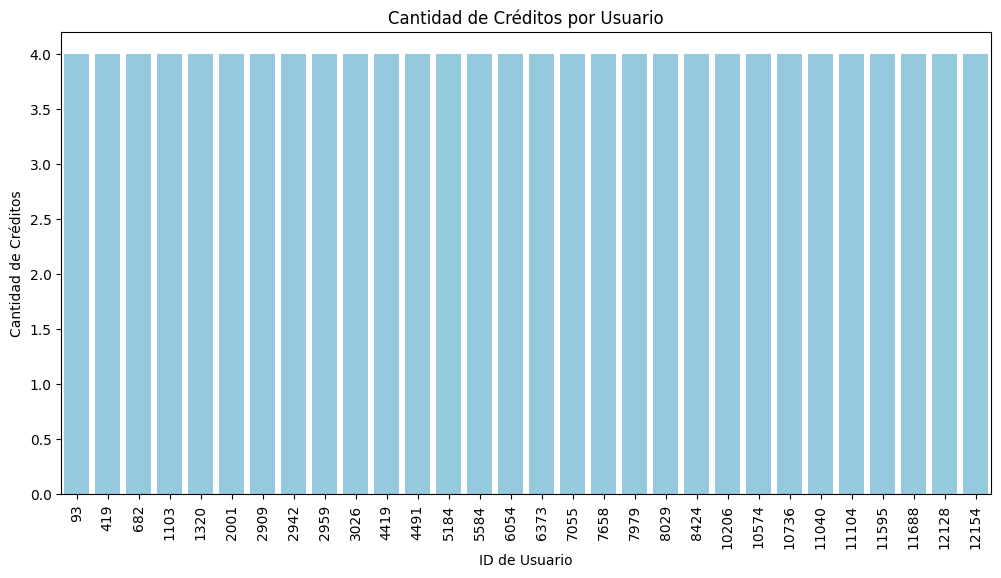

In [9]:
#calcular la cantidad de creditos por usuario
creditos_por_usuario = df_creditos['usuario_id'].value_counts().reset_index()
creditos_por_usuario.columns = ['usuario_id', 'creditos']
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=creditos_por_usuario.head(30),  # muestra los 30 primeros para mejor visualización
    x='usuario_id',
    y='creditos',
    color='skyblue'
)
plt.title('Cantidad de Créditos por Usuario')
plt.xlabel('ID de Usuario')
plt.ylabel('Cantidad de Créditos')
plt.xticks(rotation=90)
plt.show()

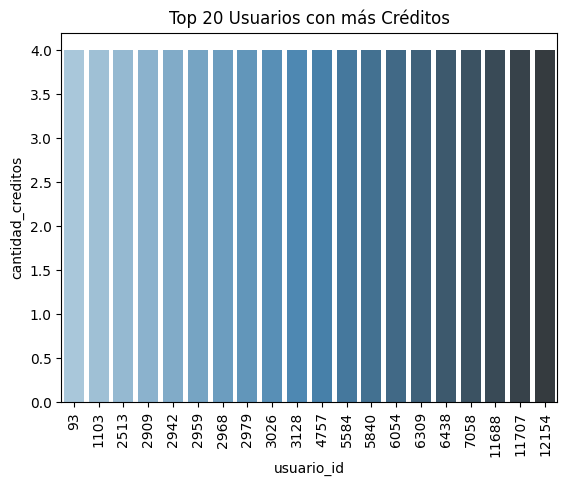

In [10]:
# Obtener todos los créditos
creditos = "SELECT * FROM creditos"
df_creditos = pd.read_sql(creditos, conn)

# Créditos por usuario
creditos_por_usuario = df_creditos.groupby('usuario_id').size().reset_index(name='cantidad_creditos')

# Top 20 usuarios con más créditos
top_creditos = creditos_por_usuario.sort_values('cantidad_creditos', ascending=False).head(20)

# Graficar
sns.barplot(data=top_creditos, x='usuario_id', y='cantidad_creditos', palette='Blues_d')
plt.title("Top 20 Usuarios con más Créditos")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#El credito de mas valor
# Agrupar por usuario y sumar los créditos
usuario_max_credito = df_creditos.groupby('usuario_id')['monto'].sum().idxmax()

# Mostrar el usuario con más créditos
print(f"El uUsuario con menos el crédito más elevado: {usuario_max_credito}")
# Obtener también el monto de crédito
max_credito = df_creditos.groupby('usuario_id')['monto'].sum().max()

print(f"Usuario con menos el crédito más elevado: {usuario_max_credito}, Créditos totales: {max_credito} €")



El usuario con más créditos es: 5184
Usuario con más créditos: 5184, Créditos totales: 170079.0


In [17]:
#el credito de menos valor
# Agrupar por usuario y sumar los créditos
usuario_max_credito = df_creditos.groupby('usuario_id')['monto'].sum().idxmin()

# Mostrar el usuario con más créditos
print(f"suario con menos el crédito más bajo {usuario_max_credito}")
# Obtener también el monto de crédito
max_credito = df_creditos.groupby('usuario_id')['monto'].sum().min()

print(f"Usuario con menos el crédito más bajo: {usuario_max_credito}, Créditos totales: {max_credito} €")

suario con menos el crédito más bajo 10056
Usuario con menos el crédito más bajo: 10056, Créditos totales: 1008.39 €


In [18]:
#cantidad mayor de prestamo
# Contar cuántos créditos solicitó cada usuario
conteo_creditos = df_creditos['usuario_id'].value_counts()

# Obtener el usuario con más créditos
usuario_mas_creditos = conteo_creditos.idxmax()
cantidad_creditos = conteo_creditos.max()

print(f"El usuario {usuario_mas_creditos} es el que más créditos ha solicitado, con un total de {cantidad_creditos} créditos.")


El usuario 2942 es el que más créditos ha solicitado, con un total de 4 créditos.


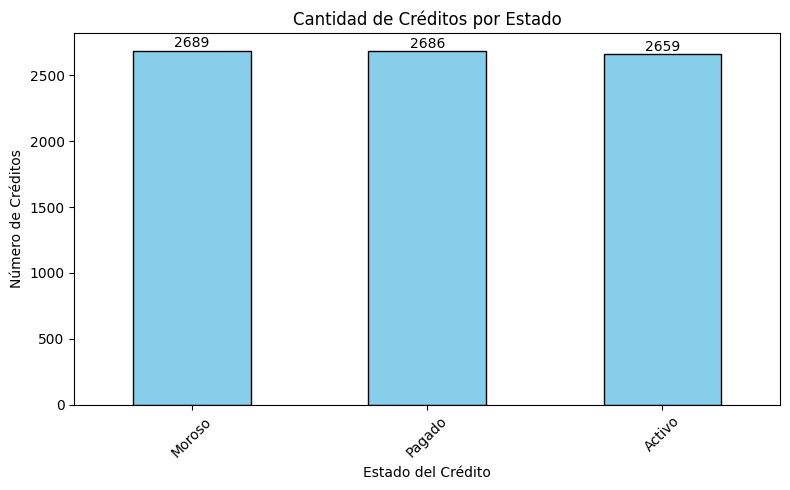

In [20]:
#credito por estado: # Contar cuántos créditos hay por estado
# Contar cuántos créditos hay por estado
creditos_por_estado = df_creditos['estado'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
bars = creditos_por_estado.plot(kind='bar', color='skyblue', edgecolor='black')

# Añadir etiquetas numéricas sobre cada barra
for i, valor in enumerate(creditos_por_estado):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=10)

# Añadir etiquetas y título
plt.title('Cantidad de Créditos por Estado')
plt.xlabel('Estado del Crédito')
plt.ylabel('Número de Créditos')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

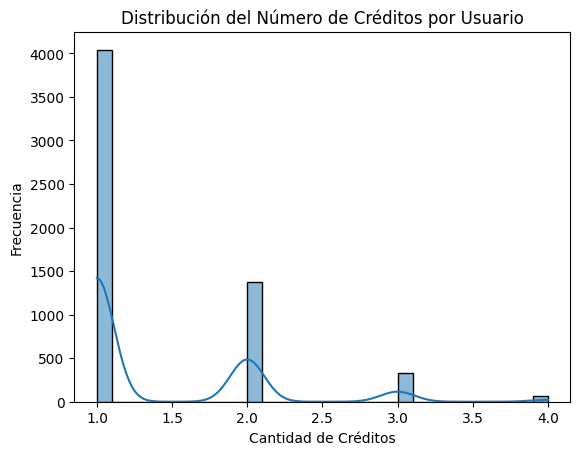

In [21]:
# Obtener todos los créditos
consulta_creditos = "SELECT * FROM creditos"
df_creditos = pd.read_sql(consulta_creditos, conn)

# Créditos por usuario
creditos_por_usuario = df_creditos.groupby('usuario_id').size().reset_index(name='cantidad_creditos')

# Distribución de créditos
sns.histplot(creditos_por_usuario['cantidad_creditos'], bins=30, kde=True)
plt.title("Distribución del Número de Créditos por Usuario")
plt.xlabel("Cantidad de Créditos")
plt.ylabel("Frecuencia")
plt.show()


In [22]:
# Estadísticas descriptivas básicas
estadisticas = creditos_por_usuario['cantidad_creditos'].describe()

# Cálculos adicionales si se desea
percentil_90 = creditos_por_usuario['cantidad_creditos'].quantile(0.9)
percentil_95 = creditos_por_usuario['cantidad_creditos'].quantile(0.95)
percentil_99 = creditos_por_usuario['cantidad_creditos'].quantile(0.99)

# Mostrar
print("Resumen estadístico de la cantidad de créditos por usuario:")
print(estadisticas)
print(f"\nPercentil 90: {percentil_90}")
print(f"Percentil 95: {percentil_95}")
print(f"Percentil 99: {percentil_99}")


Resumen estadístico de la cantidad de créditos por usuario:
count    5812.000000
mean        1.382312
std         0.642726
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: cantidad_creditos, dtype: float64

Percentil 90: 2.0
Percentil 95: 3.0
Percentil 99: 4.0


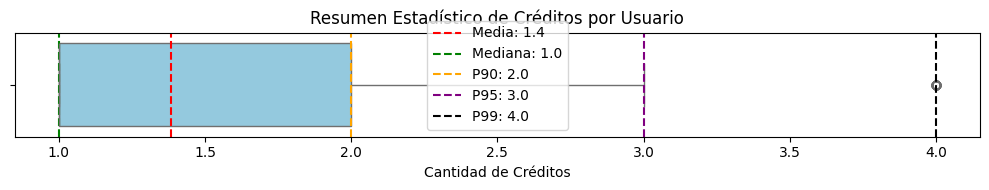

In [23]:
# Gráfico de caja (boxplot)
plt.figure(figsize=(10, 2))
sns.boxplot(x=creditos_por_usuario['cantidad_creditos'], color='skyblue')

# Cálculo de estadísticas clave
media = creditos_por_usuario['cantidad_creditos'].mean()
mediana = creditos_por_usuario['cantidad_creditos'].median()
p90 = creditos_por_usuario['cantidad_creditos'].quantile(0.90)
p95 = creditos_por_usuario['cantidad_creditos'].quantile(0.95)
p99 = creditos_por_usuario['cantidad_creditos'].quantile(0.99)

# Anotaciones en el gráfico
for valor, etiqueta, color in zip([media, mediana, p90, p95, p99],
                                  ['Media', 'Mediana', 'P90', 'P95', 'P99'],
                                  ['red', 'green', 'orange', 'purple', 'black']):
    plt.axvline(valor, color=color, linestyle='--', label=f'{etiqueta}: {valor:.1f}')

plt.title("Resumen Estadístico de Créditos por Usuario")
plt.xlabel("Cantidad de Créditos")
plt.legend()
plt.tight_layout()
plt.show()

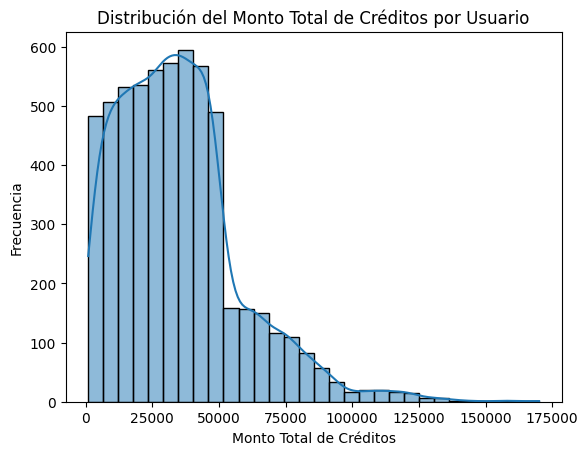

In [24]:
# Total del monto de créditos por usuario
monto_creditos = df_creditos.groupby('usuario_id')['monto'].sum().reset_index(name='monto_total_creditos')

# Histograma con KDE
sns.histplot(monto_creditos['monto_total_creditos'], bins=30, kde=True)
plt.title("Distribución del Monto Total de Créditos por Usuario")
plt.xlabel("Monto Total de Créditos")
plt.ylabel("Frecuencia")
plt.show()



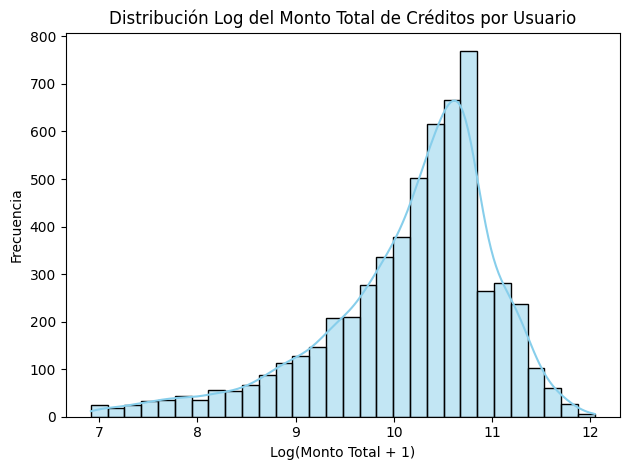

In [25]:
import numpy as np
# Histograma con escala logarítmica
sns.histplot(np.log1p(monto_creditos['monto_total_creditos']), bins=30, kde=True, color='skyblue')

plt.title("Distribución Log del Monto Total de Créditos por Usuario")
plt.xlabel("Log(Monto Total + 1)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

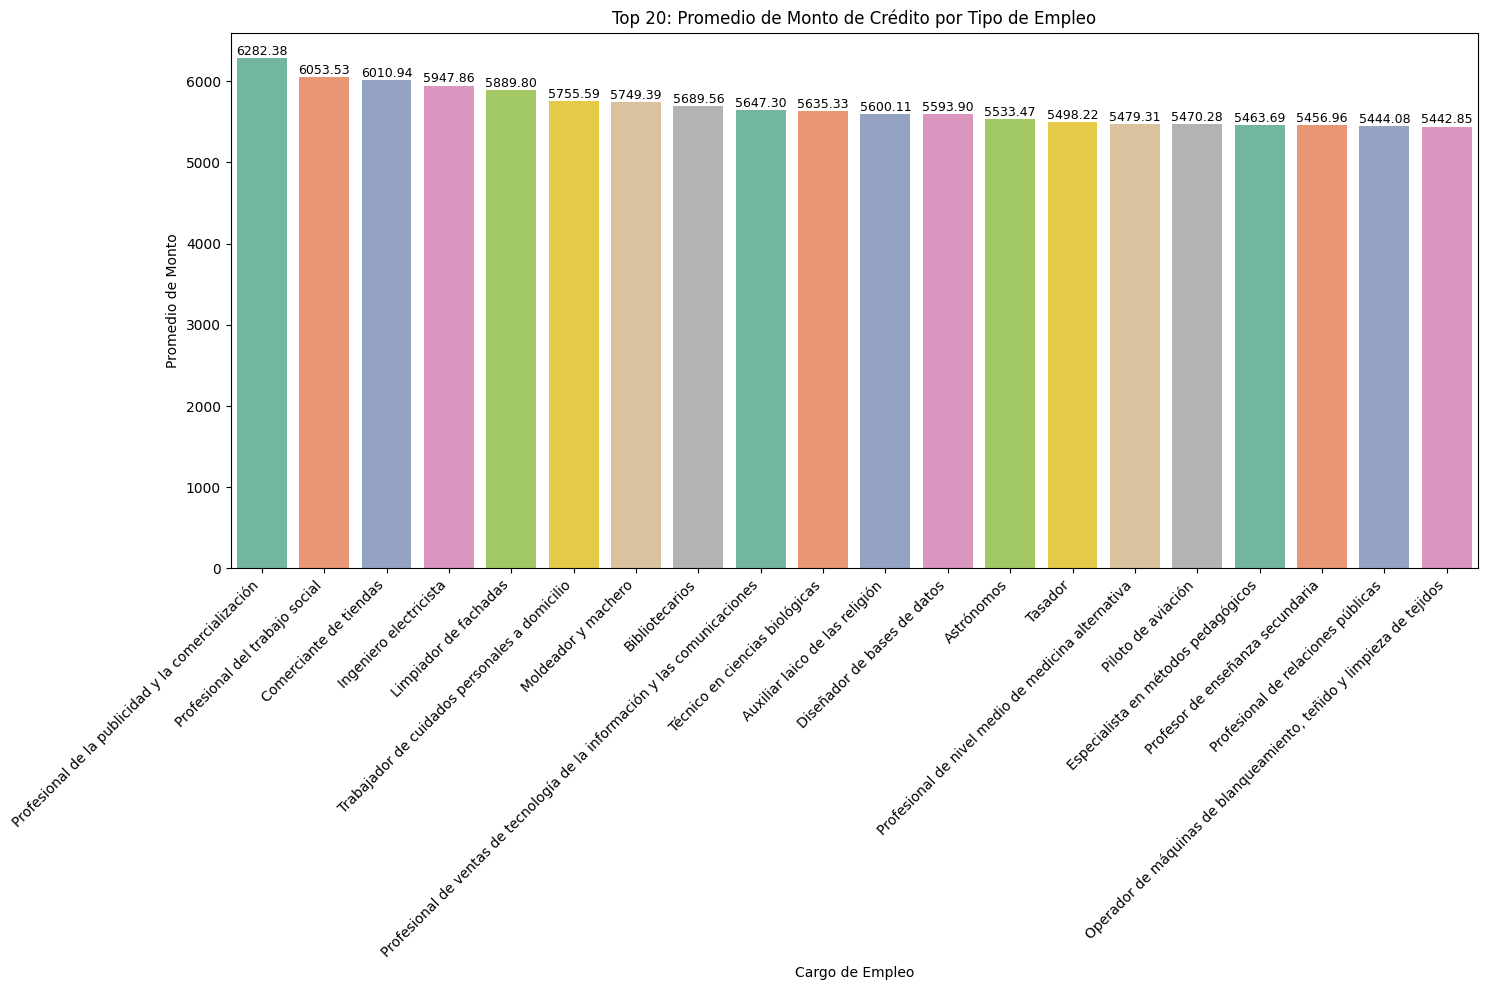

In [30]:
# Merge entre los dataframes
creditos_empleo = df_creditos.merge(df_usuarios, on='id')

# Promedio del monto de crédito por tipo de empleo
promedio_credito = creditos_empleo.groupby('profesion')['salario'].mean().reset_index()

# Ordenar por promedio de salario descendente y seleccionar top 20
top_20_profesiones = promedio_credito.sort_values(by='salario', ascending=False).head(20)

# Gráfico de barras con top 20
plt.figure(figsize=(15, 10))
barplot = sns.barplot(data=top_20_profesiones, x='profesion', y='salario', palette='Set2')

# Añadir etiquetas numéricas encima de cada barra
for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.title("Top 20: Promedio de Monto de Crédito por Tipo de Empleo")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Promedio de Monto")
plt.xlabel("Cargo de Empleo")
plt.tight_layout()
plt.show()

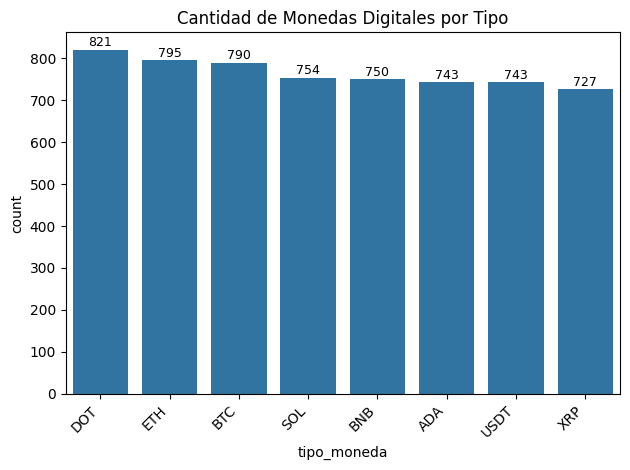

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

barplot = sns.countplot(
    data=df_monedas, 
    x='tipo_moneda', 
    order=df_monedas['tipo_moneda'].value_counts().index
)

# Añadir etiquetas numéricas encima de cada barra
for p in barplot.patches:
    height = p.get_height()
    barplot.text(
        p.get_x() + p.get_width() / 2., 
        height + 0.5, 
        f'{int(height)}',  # aquí sin decimales porque es un conteo
        ha='center', 
        va='bottom', 
        fontsize=9
    )

plt.title("Cantidad de Monedas Digitales por Tipo")
plt.xticks(rotation=45, ha='right')  # para que las etiquetas estén bien alineadas
plt.tight_layout()  # para que no se corten las etiquetas
plt.show()

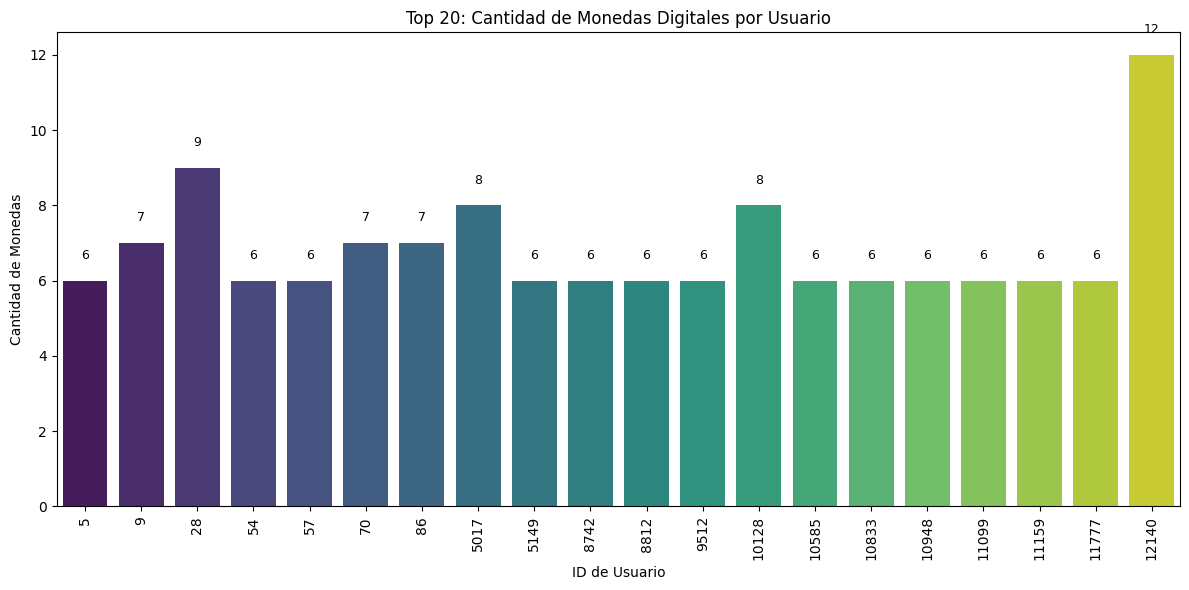

In [36]:
#monedas digitales por usuario
# Contar monedas por usuario
monedas_por_usuario = df_monedas.groupby('usuario_id').size().reset_index(name='cantidad_monedas')

# Ordenar y seleccionar top 20
top_20_monedas = monedas_por_usuario.sort_values(by='cantidad_monedas', ascending=False).head(20)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=top_20_monedas, x='usuario_id', y='cantidad_monedas', palette='viridis')

# Añadir etiquetas numéricas encima de cada barra
for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.title("Top 20: Cantidad de Monedas Digitales por Usuario")
plt.xlabel("ID de Usuario")
plt.ylabel("Cantidad de Monedas")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [35]:
#cantidad media de los creditos

# Asegúrate que las columnas estén en formato datetime
df_creditos['fecha_inicio'] = pd.to_datetime(df_creditos['fecha_inicio'])
df_creditos['fecha_fin'] = pd.to_datetime(df_creditos['fecha_fin'])

# Calcular duración en días
df_creditos['duracion_dias'] = (df_creditos['fecha_fin'] - df_creditos['fecha_inicio']).dt.days

# Calcular duración media
duracion_media = df_creditos['duracion_dias'].mean()

print(f"La duración media de los créditos es de {duracion_media:.2f} días.")


La duración media de los créditos es de 754.64 días.


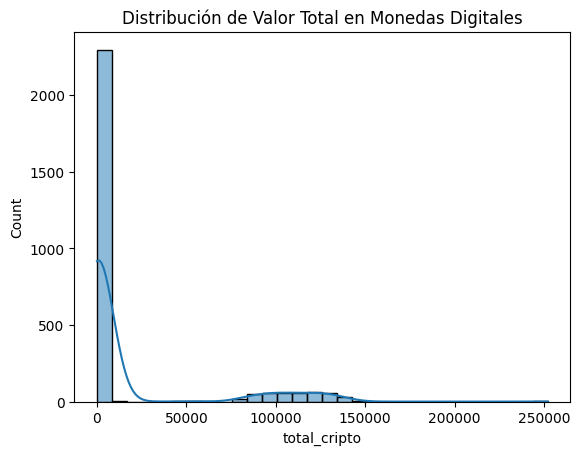

In [37]:
#valor total de criptoactivos por usuario
valor_cripto = df_monedas.groupby('usuario_id')['valor_actual'].sum().reset_index(name='total_cripto')

sns.histplot(valor_cripto['total_cripto'], bins=30, kde=True)
plt.title("Distribución de Valor Total en Monedas Digitales")
plt.show()


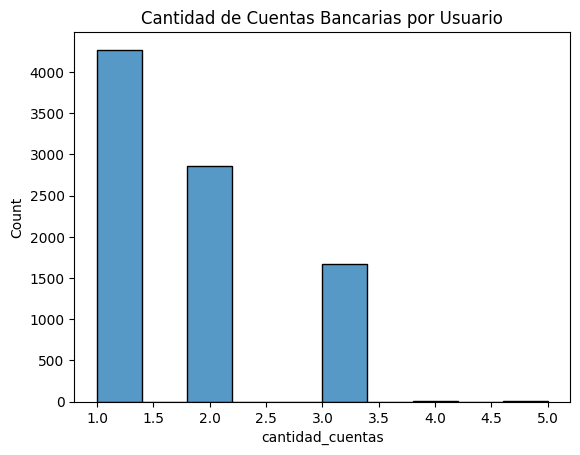

In [38]:
#Cuentas Bancarias por Usuario

cuentas_por_usuario = df_cuentas.groupby('usuario_id').size().reset_index(name='cantidad_cuentas')

sns.histplot(cuentas_por_usuario['cantidad_cuentas'], bins=10)
plt.title("Cantidad de Cuentas Bancarias por Usuario")
plt.show()

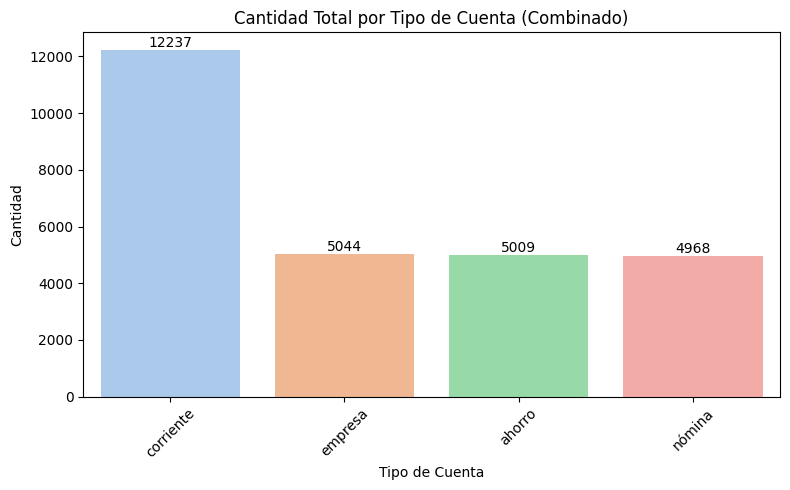

In [46]:
# Extraer solo las columnas necesarias
cuentas_cuenta = df_cuentas[['usuario_id', 'tipo_cuenta']].copy()
cuentas_usuario = df_usuarios[['id', 'tipo_cuenta']].copy()

# Añadir una columna para saber origen si quieres (opcional)
cuentas_cuenta['origen'] = 'cuentas'
cuentas_usuario['origen'] = 'usuarios'

# Concatenar filas de ambos DataFrames
df_tipos_cuenta = pd.concat([cuentas_cuenta, cuentas_usuario], ignore_index=True)

# Ahora contamos todos los tipos de cuenta juntos
cantidad_cuentas = df_tipos_cuenta['tipo_cuenta'].value_counts().reset_index()
cantidad_cuentas.columns = ['tipo_cuenta', 'cantidad']

# Gráfico con etiquetas
plt.figure(figsize=(8, 5))
barplot = sns.barplot(data=cantidad_cuentas, x='tipo_cuenta', y='cantidad', palette='pastel')

for p in barplot.patches:
    height = p.get_height()
    barplot.text(
        p.get_x() + p.get_width() / 2., 
        height + 0.3, 
        f'{int(height)}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

plt.title('Cantidad Total por Tipo de Cuenta (Combinado)')
plt.xlabel('Tipo de Cuenta')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
print(f"Filas en df_activos: {len(df_activos)}")
print(df_activos.head())


Filas en df_activos: 4153
   id  usuario_id  tipo_activo          descripcion      monto
0   1           7       ahorro  Activos financieros   74284.27
1   2           8       ahorro  Activos financieros   14384.02
2   3           7  inversiones  Activos financieros  222459.66
3   4           3       ahorro  Activos financieros   59254.00
4   5           5       ahorro  Activos financieros    9822.68


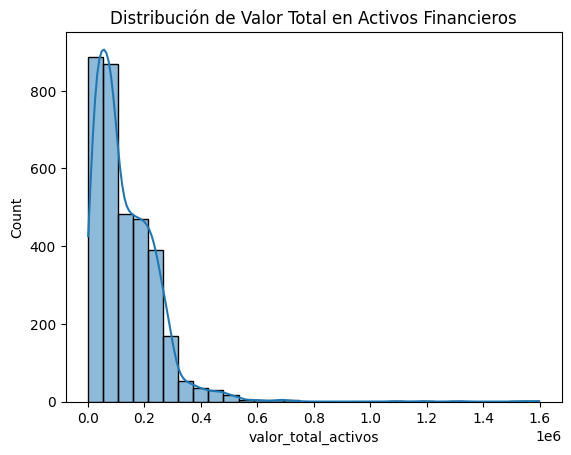

In [48]:
#Activos Financieros por Usuario

activos_por_usuario = df_activos.groupby('usuario_id')['monto'].sum().reset_index(name='valor_total_activos')

sns.histplot(activos_por_usuario['valor_total_activos'], bins=30, kde=True)
plt.title("Distribución de Valor Total en Activos Financieros")
plt.show()

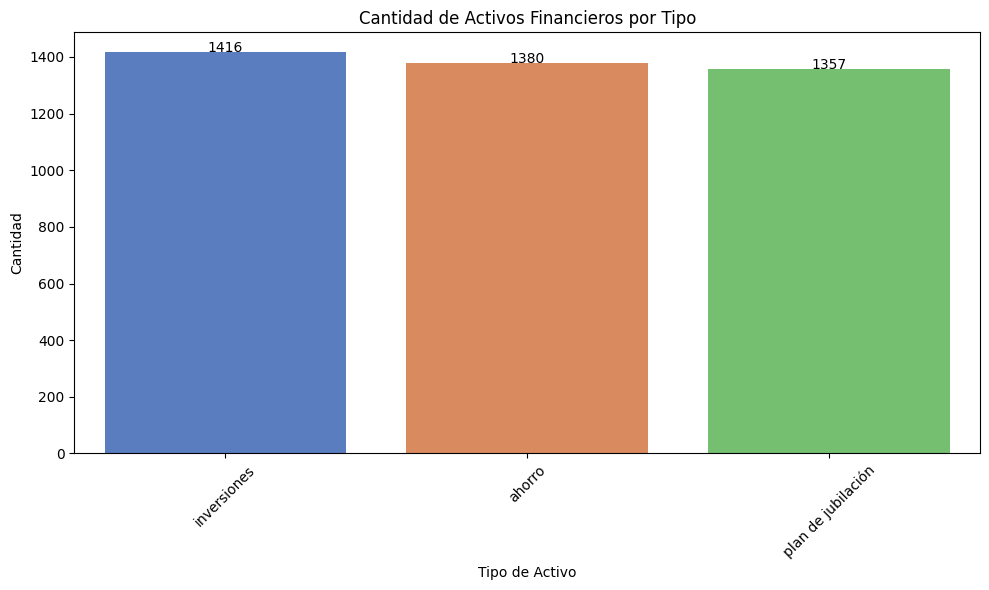

In [50]:
#activos financieros
# Contar cantidad de activos por tipo
activos_por_tipo = df_activos['tipo_activo'].value_counts().reset_index()
activos_por_tipo.columns = ['tipo_activo', 'cantidad']

# Gráfico de barras
plt.figure(figsize=(10,6))
barplot = sns.barplot(data=activos_por_tipo, x='tipo_activo', y='cantidad', palette='muted')

# Etiquetas encima de barras
for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2., height + 0.3, f'{int(height)}', ha='center')

plt.title('Cantidad de Activos Financieros por Tipo')
plt.xlabel('Tipo de Activo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

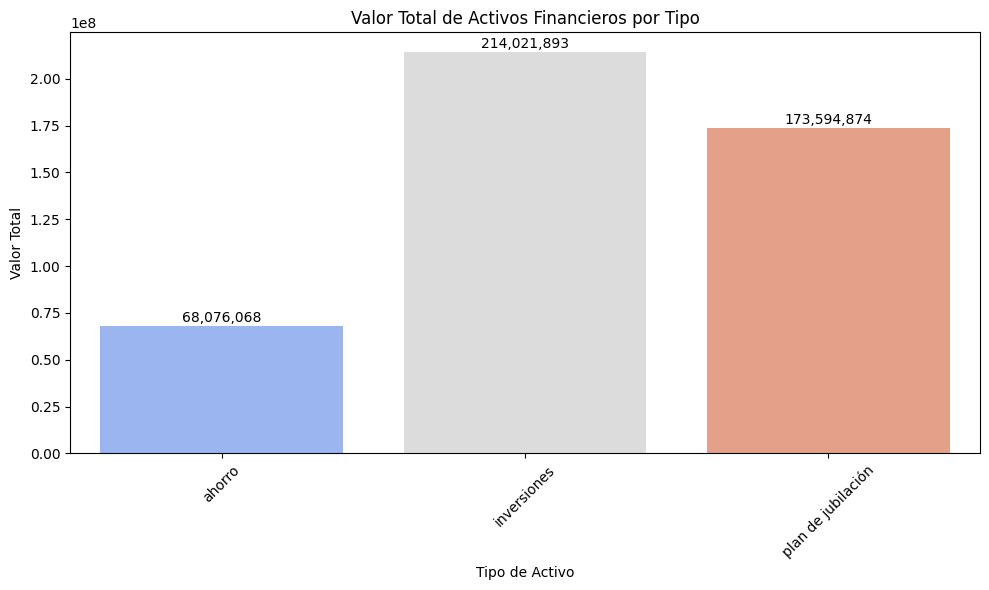

In [52]:
# Sumar valor por tipo de activo
valor_por_tipo = df_activos.groupby('tipo_activo')['monto'].sum().reset_index()

plt.figure(figsize=(10,6))
barplot = sns.barplot(data=valor_por_tipo, x='tipo_activo', y='monto', palette='coolwarm')

# Etiquetas con valores encima
for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2., height + max(valor_por_tipo['monto'])*0.01, f'{height:,.0f}', ha='center')

plt.title('Valor Total de Activos Financieros por Tipo')
plt.xlabel('Tipo de Activo')
plt.ylabel('Valor Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


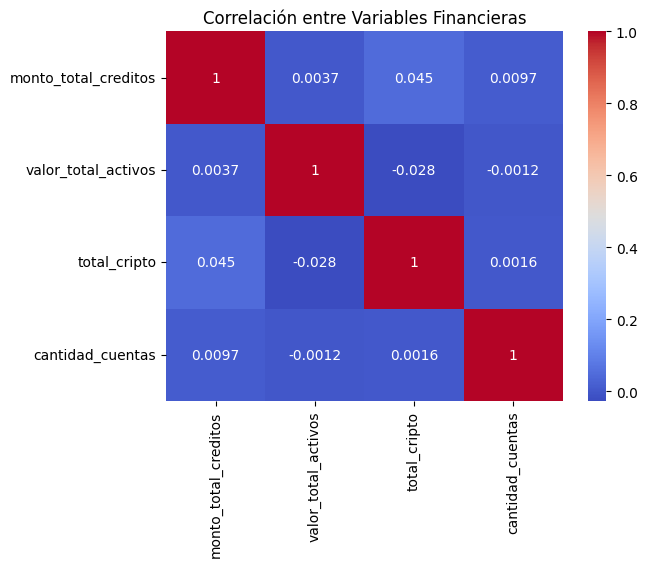

In [49]:
#correlacion financiera
df_usuarios.rename(columns={'id': 'usuario_id'}, inplace=True)

df_merged = (
    df_usuarios
    .merge(df_creditos.groupby('usuario_id')['monto'].sum().reset_index(name='monto_total_creditos'), on='usuario_id', how='left')
    .merge(activos_por_usuario, on='usuario_id', how='left')
    .merge(valor_cripto, on='usuario_id', how='left')
    .merge(cuentas_por_usuario, on='usuario_id', how='left')
)

sns.heatmap(
    df_merged[['monto_total_creditos', 'valor_total_activos', 'total_cripto', 'cantidad_cuentas']]
    .corr(numeric_only=True),
    annot=True, cmap='coolwarm'
)
plt.title("Correlación entre Variables Financieras")
plt.show()


In [ ]:
# Revisa cuántas filas tiene el DataFrame final
print(f"Filas en df_merged: {len(df_merged)}")

# Cuántos valores no nulos tienes en las columnas que usas
print(df_merged[['valor_total_activos', 'monto_total_creditos']].info())

# Revisa cuántos valores NaN hay en cada columna
print(df_merged[['valor_total_activos', 'monto_total_creditos']].isna().sum())

# Opcional: ver algunos datos con NaN para saber por qué faltan
print(df_merged[df_merged['monto_total_creditos'].isna()][['usuario_id', 'monto_total_creditos', 'valor_total_activos']].head())
print(df_merged[df_merged['valor_total_activos'].isna()][['usuario_id', 'monto_total_creditos', 'valor_total_activos']].head())


In [ ]:
print(activos_por_usuario.head())
print(activos_por_usuario.columns)
print(f"Filas en activos_por_usuario: {len(activos_por_usuario)}")
print(f"Valores nulos en usuario_id: {activos_por_usuario['usuario_id'].isna().sum()}")
print(f"Valores nulos en valor_total_activos: {activos_por_usuario['valor_total_activos'].isna().sum()}")


In [ ]:
print(df_usuarios.columns)
print(df_creditos.columns)
print(activos_por_usuario.columns)


In [ ]:
# Usuarios únicos en cada DataFrame
usuarios_usuarios = set(df_usuarios['usuario_id'])
usuarios_activos = set(activos_por_usuario['usuario_id'])

print(f"Usuarios en df_usuarios: {len(usuarios_usuarios)}")
print(f"Usuarios en activos_por_usuario: {len(usuarios_activos)}")

# Usuarios comunes
usuarios_comunes = usuarios_usuarios.intersection(usuarios_activos)
print(f"Usuarios comunes en ambos: {len(usuarios_comunes)}")


In [ ]:
df_merged['valor_total_activos'] = df_merged['valor_total_activos'].fillna(0)


In [ ]:
#Relación Créditos vs Activos

sns.scatterplot(data=df_merged, x='valor_total_activos', y='monto_total_creditos')
plt.title("Créditos vs Activos Financieros")
plt.xlabel("Total de Activos Financieros")
plt.ylabel("Total de Créditos")
plt.grid(True)
plt.show()

In [ ]:
# Créditos por Provincia
creditos = pd.read_sql("SELECT * FROM creditos", conn)

# Merge créditos con usuarios para obtener provincia
creditos_provincia = creditos.merge(df_usuarios[['usuario_id', 'provincia']], on='usuario_id')

# Contar créditos por provincia
creditos_provincia = creditos_provincia.groupby('provincia').size().reset_index(name='cantidad_creditos')

# Graficar cantidad de créditos por provincia
sns.barplot(data=creditos_provincia.sort_values('cantidad_creditos', ascending=False), 
            x='provincia', y='cantidad_creditos', palette='crest')

plt.xticks(rotation=45)
plt.title("Cantidad de Créditos por Provincia")
plt.ylabel("N° Créditos")
plt.xlabel("Provincia")
plt.tight_layout()
plt.show()


In [ ]:
#Créditos por Nacionalidad

creditos_nacionalidad = creditos.merge(df_usuarios[['usuario_id', 'nacionalidad']], on='usuario_id')
creditos_nacionalidad = creditos_nacionalidad.groupby('nacionalidad').size().reset_index(name='cantidad_creditos')

sns.barplot(data=creditos_nacionalidad.sort_values('cantidad_creditos', ascending=False).head(10),
            x='nacionalidad', y='cantidad_creditos', palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Nacionalidades con más Créditos")
plt.tight_layout()
plt.show()

In [ ]:
#¿Los morosos tienen más créditos?

usuarios_mora = df_usuarios[['usuario_id', 'es_moroso']]
creditos_mora = creditos.merge(usuarios_mora, on='usuario_id')
creditos_mora = creditos_mora.groupby('es_moroso').size().reset_index(name='cantidad_creditos')

sns.barplot(data=creditos_mora, x='es_moroso', y='cantidad_creditos', palette='flare')
plt.title("Cantidad de Créditos según si el Usuario es Moroso")
plt.xlabel("Moroso (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de Créditos")
plt.show()

In [ ]:
#Morosidad según Edad
# Asegurar que fecha_nacimiento sea datetime
df_usuarios['fecha_nacimiento'] = pd.to_datetime(df_usuarios['fecha_nacimiento'])

# Calcular edad en años (entera)
hoy = pd.to_datetime('today')
df_usuarios['edad'] = (hoy - df_usuarios['fecha_nacimiento']).dt.days // 365

# Ahora sí, el resto de tu código
usuarios_mora_edad = df_usuarios[['usuario_id', 'edad', 'es_moroso']]

# Crear rangos de edad
usuarios_mora_edad['rango_edad'] = pd.cut(
    usuarios_mora_edad['edad'],
    bins=[18, 25, 35, 45, 55, 65, 100],
    labels=['18–25', '26–35', '36–45', '46–55', '56–65', '65+']
)

# Calcular tasa de morosidad por rango de edad
mora_por_edad = usuarios_mora_edad.groupby('rango_edad')['es_moroso'].mean().reset_index()

# Graficar
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=mora_por_edad, x='rango_edad', y='es_moroso', palette='magma')
plt.title("Tasa de Morosidad por Rango de Edad")
plt.ylabel("Proporción de Morosos")
plt.xlabel("Rango de Edad")
plt.ylim(0, 1)
plt.show()

In [ ]:
#Morosidad según Provincia

mora_provincia = df_usuarios.groupby('provincia')['es_moroso'].mean().reset_index()

sns.barplot(data=mora_provincia.sort_values('es_moroso', ascending=False), 
            x='provincia', y='es_moroso', palette='rocket')
plt.xticks(rotation=45)
plt.title("Tasa de Morosidad por Provincia")
plt.ylabel("Proporción de Morosos")
plt.xlabel("Provincia")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
#Morosidad según Nacionalidad

mora_nacionalidad = df_usuarios.groupby('nacionalidad')['es_moroso'].mean().reset_index()

# Top 10 nacionalidades con más morosidad
top_nacionalidad = mora_nacionalidad.sort_values('es_moroso', ascending=False).head(10)

sns.barplot(data=top_nacionalidad, x='nacionalidad', y='es_moroso', palette='flare')
plt.xticks(rotation=45)
plt.title("Tasa de Morosidad por Nacionalidad (Top 10)")
plt.ylabel("Proporción de Morosos")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
#Morosidad según Estado Civil

mora_estado_civil = df_usuarios.groupby('estado_civil')['es_moroso'].mean().reset_index()

sns.barplot(data=mora_estado_civil.sort_values('es_moroso', ascending=False),
            x='estado_civil', y='es_moroso', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Tasa de Morosidad por Estado Civil")
plt.ylabel("Proporción de Morosos")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
#Morosidad según Edad

df_usuarios['rango_edad'] = pd.cut(
    df_usuarios['edad'],
    bins=[18, 25, 35, 45, 55, 65, 100],
    labels=['18–25', '26–35', '36–45', '46–55', '56–65', '65+']
)

mora_edad = df_usuarios.groupby('rango_edad')['es_moroso'].mean().reset_index()

sns.barplot(data=mora_edad, x='rango_edad', y='es_moroso', palette='magma')
plt.title("Tasa de Morosidad por Rango de Edad")
plt.ylabel("Proporción de Morosos")
plt.ylim(0, 1)
plt.show()

In [ ]:
#Morosidad según salario

usuarios_empleo = df_usuarios.merge(df_empleos[['usuario_id', 'salario']], on='usuario_id')

sns.boxplot(data=usuarios_empleo, x='es_moroso', y='salario', palette='Set3')
plt.title("Distribución de salario según Morosidad")
plt.xticks([0, 1], ['No Moroso', 'Moroso'])
plt.ylabel("Salario")
plt.show()

In [ ]:
#Morosidad por Tipo de Empleo

usuarios_empleo = df_usuarios.merge(df_empleos[['usuario_id', 'cargo']], on='usuario_id')

mora_empleo = usuarios_empleo.groupby('cargo')['es_moroso'].mean().reset_index()

sns.barplot(data=mora_empleo.sort_values('es_moroso', ascending=False),
            x='cargo', y='es_moroso', palette='cubehelix')
plt.xticks(rotation=45)
plt.title("Tasa de Morosidad por Tipo de Empleo")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
#Créditos y Morosidad combinados

#¿Tienen más créditos los morosos?

creditos_usuario = creditos.groupby('usuario_id').size().reset_index(name='cantidad_creditos')
usuarios_creditos = df_usuarios.merge(creditos_usuario, on='usuario_id', how='left')
usuarios_creditos['cantidad_creditos'] = usuarios_creditos['cantidad_creditos'].fillna(0)

sns.boxplot(data=usuarios_creditos, x='es_moroso', y='cantidad_creditos', palette='Set2')
plt.title("Cantidad de Créditos según Morosidad")
plt.xticks([0, 1], ['No Moroso', 'Moroso'])
plt.ylabel("N° Créditos")
plt.show()

In [ ]:
#Distribución de Edad según Morosidad (Densidad)

sns.kdeplot(data=df_usuarios, x='edad', hue='es_moroso', common_norm=False, fill=True, palette='coolwarm')
plt.title("Distribución de Edad según Morosidad")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.show()

In [ ]:
#Heatmap cruzado: Morosidad por Provincia y Estado Civil

pivot = df_usuarios.pivot_table(index='provincia', columns='estado_civil', values='es_moroso', aggfunc='mean')

sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlOrRd')
plt.title("Morosidad Promedio por Provincia y Estado Civil")
plt.ylabel("Provincia")
plt.xlabel("Estado Civil")
plt.tight_layout()
plt.show()

In [ ]:
#Preparación de datos combinados

# Unir usuarios con empleo, creditos y activos
df = df_usuarios.merge(df_empleos[['usuario_id', 'salario', 'cargo']], on='usuario_id', how='left')
df = df.merge(creditos.groupby('usuario_id').size().reset_index(name='cantidad_creditos'), on='usuario_id', how='left')
df = df.merge(df_activos[['usuario_id', 'monto']], on='usuario_id', how='left')

df['cantidad_creditos'] = df['cantidad_creditos'].fillna(0)
df['monto'] = df['monto'].fillna(0)

In [ ]:
#Preprocesamiento

# Variables categóricas a codificar
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Variables categóricas a codificar
cat_vars = ['provincia', 'estado_civil', 'cargo', 'nacionalidad']
df[cat_vars] = df[cat_vars].fillna("Desconocido")

# Codificar etiquetas
for col in cat_vars:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Escalamiento
features = ['edad', 'salario', 'provincia', 'estado_civil', 'cargo', 'cantidad_creditos', 'monto']
X_scaled = StandardScaler().fit_transform(df[features])

In [ ]:
#Clustering (por ejemplo, KMeans)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster_riesgo'] = kmeans.fit_predict(X_scaled)

sns.countplot(x='cluster_riesgo', data=df, palette='tab10')
plt.title("Distribución de Usuarios por Clúster de Riesgo")
plt.show()

# Perfil de clusters
df.groupby('cluster_riesgo')[features].mean()

In [ ]:
# a) Agregar cantidad y monto total de créditos por usuario
creditos_agg = df_creditos.groupby('usuario_id').agg(
    cantidad_creditos_agg=('id', 'count'),
    monto_agg=('monto', 'sum')
).reset_index()

# b) Eliminar columnas que puedan causar conflicto antes del merge
df_usuarios = df_usuarios.drop(columns=['monto', 'cantidad_creditos'], errors='ignore')

# c) Unir con df_usuarios
df_usuarios = df_usuarios.merge(creditos_agg, on='usuario_id', how='left')

# d) Unir datos de empleo
df_usuarios = df_usuarios.merge(df_empleos[['usuario_id', 'salario', 'cargo']], on='usuario_id', how='left')

# e) Rellenar valores faltantes
df_usuarios['cantidad_creditos_agg'] = df_usuarios['cantidad_creditos_agg'].fillna(0)
df_usuarios['monto_agg'] = df_usuarios['monto_agg'].fillna(0)
df_empleos['salario'] = df_empleos['salario'].fillna(0)
df_usuarios['cargo'] = df_usuarios['cargo'].fillna("Desconocido")
df_usuarios['provincia'] = df_usuarios['provincia'].fillna("Desconocido")
df_usuarios['estado_civil'] = df_usuarios['estado_civil'].fillna("Desconocido")

# f) Codificar variables categóricas
cat_vars = ['provincia', 'estado_civil', 'cargo']
for col in cat_vars:
    le = LabelEncoder()
    df_usuarios[col] = le.fit_transform(df_usuarios[col])

# g) Definir features y etiqueta (renombrar columnas para facilitar)
df_usuarios.rename(columns={
    'cantidad_creditos_agg': 'cantidad_creditos',
    'monto_agg': 'monto'
}, inplace=True)

features = ['edad', 'salario', 'provincia', 'estado_civil', 'cargo', 'cantidad_creditos', 'monto']
X = df_usuarios[features]
y = df_usuarios['es_moroso']

# h) División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# i) Entrenar Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# j) Evaluar
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


In [ ]:
importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
importances.plot(kind='barh', title='Importancia de las Variables')
plt.show()


In [ ]:
#Validación cruzada

from sklearn.model_selection import cross_val_score

# Validación cruzada (5 folds)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"Accuracy promedio con validación cruzada: {scores.mean():.4f}")

In [ ]:
#Búsqueda de hiperparámetros con GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)

# Evaluar con mejores parámetros
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

In [ ]:
#ROC Curve y AUC

from sklearn.metrics import roc_curve, auc

# Probabilidades
y_scores = best_model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
#usuarios con más de 3 créditos
usuarios_mas_creditos = df_usuarios[df_usuarios['usuario_id'].isin(creditos_por_usuario[creditos_por_usuario['cantidad_creditos'] > 3]['usuario_id'])]
usuarios_mas_creditos[['usuario_id', 'nombre', 'apellido', 'cantidad_creditos']].sort_values(by='cantidad_creditos', ascending=False).head(10)


In [ ]:
#usuarios por provincia
usuarios_provincia = df_usuarios.groupby('provincia').size().reset_index(name='cantidad_usuarios')
sns.barplot(data=usuarios_provincia.sort_values('cantidad_usuarios', ascending=False), 
            x='provincia', y='cantidad_usuarios', palette='viridis')
plt.title("Cantidad de Usuarios por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Usuarios")
plt.show()


In [ ]:
#usuario si es moroso o no
df_usuarios['es_moroso'] = df_usuarios['es_moroso'].astype(int)  # Asegurarse de que es int
sns.countplot(data=df_usuarios, x='es_moroso', palette='Set1')


In [ ]:
#usuario por nacionalidad
usuarios_nacionalidad = df_usuarios.groupby('nacionalidad').size().reset_index(name='cantidad_usuarios')
sns.barplot(data=usuarios_nacionalidad.sort_values('cantidad_usuarios', ascending=False).head(10),
            x='nacionalidad', y='cantidad_usuarios', palette='viridis')
plt.title("Top 10 Nacionalidades con más Usuarios")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#cantidad de usuarios por provincia
usuarios_provincia = df_usuarios.groupby('provincia').size().reset_index(name='cantidad_usuarios')
sns.barplot(data=usuarios_provincia.sort_values('cantidad_usuarios', ascending=False),

            x='provincia', y='cantidad_usuarios', palette='viridis')
plt.title("Cantidad de Usuarios por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Usuarios")
plt.show()


In [ ]:
#cantidad de monedas digitales por usuario
monedas_por_usuario = df_monedas.groupby('usuario_id').size().reset_index(name='cantidad_monedas')
sns.barplot(data=monedas_por_usuario, x='usuario_id', y='cantidad_monedas', palette='viridis')
plt.title("Cantidad de Monedas Digitales por Usuario")
plt.xlabel("ID de Usuario")
plt.ylabel("Cantidad de Monedas")
plt.show()

In [ ]:
#antiguedad de monedas digitales por usuario
monedas_antiguedad = df_monedas.groupby('usuario_id')['fecha_creacion'].min().reset_index()
monedas_antiguedad['antiguedad'] = (pd.to_datetime('today') - monedas_antiguedad['fecha_creacion']).dt.days
sns.histplot(monedas_antiguedad['antiguedad'], bins=30, kde=True)
plt.title("Antigüedad de Monedas Digitales por Usuario")
plt.xlabel("Días desde Creación")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
#cantidad de monedas digitales por usuario
monedas_por_usuario = df_monedas.groupby('usuario_id').size().reset_index(name='cantidad_monedas')
sns.barplot(data=monedas_por_usuario, x='usuario_id', y='cantidad_monedas', palette='viridis')
plt.title("Cantidad de Monedas Digitales por Usuario")
plt.xlabel("ID de Usuario")
plt.ylabel("Cantidad de Monedas")
plt.show()

In [ ]:
#antiguedad de empleos por usuario
empleos_antiguedad = df_empleos.groupby('usuario_id')['fecha_inicio'].min().reset_index()
empleos_antiguedad['antiguedad'] = (pd.to_datetime('today') - empleos_antiguedad['fecha_inicio']).dt.days
sns.histplot(empleos_antiguedad['antiguedad'], bins=30, kde=True)
plt.title("Antigüedad de Empleos por Usuario")
plt.xlabel("Días desde Inicio")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
#empleos mas antiguedad mayor creditos de usuarios
empleos_antiguedad_creditos = df_empleos.groupby('usuario_id').agg({'fecha_inicio': 'min', 'usuario_id': 'count'}).reset_index()
empleos_antiguedad_creditos.columns = ['usuario_id', 'fecha_inicio', 'cantidad_creditos']
empleos_antiguedad_creditos['antiguedad'] = (pd.to_datetime('today') - empleos_antiguedad_creditos['fecha_inicio']).dt.days


In [ ]:
#mayor antiguedad en emplos mas activos
empleos_mas_activos = df_empleos.groupby('usuario_id').size().reset_index(name='cantidad_empleos')
empleos_mas_activos = empleos_mas_activos.sort_values('cantidad_empleos', ascending=False).head(20)
sns.barplot(data=empleos_mas_activos, x='usuario_id', y='cantidad_empleos', palette='viridis')
plt.title("Top 20 Usuarios con más Empleos Activos")
plt.xlabel("ID de Usuario")
plt.show()

In [ ]:
#mayor antiguedad mas activos financieros
activos_mas_activos = df_activos.groupby('usuario_id').size().reset_index(name='cantidad_activos')
activos_mas_activos = activos_mas_activos.sort_values('cantidad_activos', ascending=False).head(20)
sns.barplot(data=activos_mas_activos, x='usuario_id', y='cantidad_activos', palette='viridis')
plt.title("Top 20 Usuarios con más Activos Financieros")
plt.xlabel("ID de Usuario")
plt.show()

In [ ]:
#mayor antiguedad en el empleo mayor cantidad de creditos
empleos_creditos = df_empleos.merge(creditos, on='usuario_id', how='left')
empleos_creditos = empleos_creditos.groupby('usuario_id').agg({'fecha_inicio': 'min', 'usuario_id': 'count'}).reset_index()
empleos_creditos.columns = ['usuario_id', 'fecha_inicio', 'cantidad_creditos']
empleos_creditos['antiguedad'] = (pd.to_datetime('today') - empleos_creditos['fecha_inicio']).dt.days
sns.scatterplot(data=empleos_creditos, x='antiguedad', y='cantidad_creditos', color='blue')
plt.title("Antigüedad del Empleo vs Cantidad de Créditos")
plt.xlabel("Antigüedad (días)")
plt.ylabel("Cantidad de Créditos")
plt.show()


In [ ]:
#mayor antiguedad en el empleo mayor cantidad de activos financieros
empleos_activos = df_empleos.merge(df_activos, on='usuario_id', how='left')
empleos_activos = empleos_activos.groupby('usuario_id').agg({'fecha_inicio': 'min', 'valor_estimado': 'sum'}).reset_index()
empleos_activos.columns = ['usuario_id', 'fecha_inicio', 'valor_total_activos']
empleos_activos['antiguedad'] = (pd.to_datetime('today') - empleos_activos['fecha_inicio']).dt.days
sns.scatterplot(data=empleos_activos, x='antiguedad', y='valor_total_activos', color='green')
plt.title("Antigüedad del Empleo vs Valor Total de Activos Financieros")
plt.xlabel("Antigüedad (días)")
plt.ylabel("Valor Total de Activos Financieros")
plt.show()

In [ ]:
# usuarios mas jovenes mas modenas digitales
usuarios_jovenes_monedas = df_usuarios[df_usuarios['edad'] < 30]
monedas_jovenes = df_monedas[df_monedas['usuario_id'].isin(usuarios_jovenes_monedas['usuario_id'])]
monedas_jovenes_por_usuario = monedas_jovenes.groupby('usuario_id').size().reset_index(name='cantidad_monedas')
sns.barplot(data=monedas_jovenes_por_usuario, x='usuario_id', y='cantidad_monedas', palette='viridis')
plt.title("Cantidad de Monedas Digitales por Usuarios Jóvenes (<30 años)")
plt.xlabel("ID de Usuario")
plt.ylabel("Cantidad de Monedas")
plt.show()


In [ ]:
#edad media creditos por provincia
edad_creditos_provincia = creditos.merge(df_usuarios[['usuario_id', 'edad', 'provincia']], on='usuario_id', how='left')
edad_creditos_provincia = edad_creditos_provincia.groupby('provincia')['edad'].mean().reset_index()
sns.barplot(data=edad_creditos_provincia.sort_values('edad', ascending=False), 
            x='provincia', y='edad', palette='viridis')
plt.title("Edad Media de Usuarios con Créditos por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Edad Media")
plt.show()


In [ ]:
#edad media creditos por nacionalidad
edad_creditos_nacionalidad = creditos.merge(df_usuarios[['usuario_id', 'edad', 'nacionalidad']], on='usuario_id', how='left')
edad_creditos_nacionalidad = edad_creditos_nacionalidad.groupby('nacionalidad')['edad'].mean().reset_index()
sns.barplot(data=edad_creditos_nacionalidad.sort_values('edad', ascending=False).head(10),
            x='nacionalidad', y='edad', palette='viridis')
plt.title("Edad Media de Usuarios con Créditos por Nacionalidad (Top 10)")
plt.xlabel("Nacionalidad")
plt.ylabel("Edad Media")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#edad media creditos, monedas digitales y activos financieros por provincia
edad_creditos_monedas_activos_provincia = (
    creditos.merge(df_usuarios[['usuario_id', 'edad', 'provincia']], on='usuario_id', how='left')
    .merge(df_monedas[['usuario_id', 'valor_usd']], on='usuario_id', how='left')
    .merge(df_activos[['usuario_id', 'valor_estimado']], on='usuario_id', how='left')
)
edad_creditos_monedas_activos_provincia = edad_creditos_monedas_activos_provincia.groupby('provincia').agg({
    'edad': 'mean',
    'valor_usd': 'sum',
    'valor_estimado': 'sum'
}).reset_index()
sns.barplot(data=edad_creditos_monedas_activos_provincia.sort_values('edad', ascending=False), 
            x='provincia', y='edad', palette='viridis')
plt.title("Edad Media, Valor Total de Monedas Digitales y Activos Financieros por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Edad Media")
plt.show()

In [ ]:
#edad media creditos, monedas digitales y activos financieros por nacionalidad
edad_creditos_monedas_activos_nacionalidad = (
    creditos.merge(df_usuarios[['usuario_id', 'edad', 'nacionalidad']], on='usuario_id', how='left')
    .merge(df_monedas[['usuario_id', 'valor_usd']], on='usuario_id', how='left')
    .merge(df_activos[['usuario_id', 'valor_estimado']], on='usuario_id', how='left')
)
edad_creditos_monedas_activos_nacionalidad = edad_creditos_monedas_activos_nacionalidad.groupby('nacionalidad').agg({
    'edad': 'mean',
    'valor_usd': 'sum',
    'valor_estimado': 'sum'
}).reset_index()
sns.barplot(data=edad_creditos_monedas_activos_nacionalidad.sort_values('edad', ascending=False).head(10),
            x='nacionalidad', y='edad', palette='viridis')
plt.title("Edad Media, Valor Total de Monedas Digitales y Activos Financieros por Nacionalidad (Top 10)")
plt.xlabel("Nacionalidad")
plt.ylabel("Edad Media")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#edad media creditos, monedas digitales y activos financieros
edad_creditos_monedas_activos_nacionalidad = (
    creditos.merge(df_usuarios[['usuario_id', 'edad']], on='usuario_id', how='left')
    .merge(df_monedas[['usuario_id', 'valor_usd']], on='usuario_id', how='left')
    .merge(df_activos[['usuario_id', 'valor_estimado']], on='usuario_id', how='left')
)
edad_creditos_monedas_activos_nacionalidad = edad_creditos_monedas_activos_nacionalidad.groupby('Usuarios').agg({
    'edad': 'mean',
    'valor_usd': 'sum',
    'valor_estimado': 'sum'
}).reset_index()
sns.barplot(data=edad_creditos_monedas_activos_nacionalidad.sort_values('edad', ascending=False).head(10),
            x='usuario', y='edad', palette='viridis')
plt.title("Edad Media, Valor Total de Monedas Digitales y Activos Financieros (Top 10)")
plt.xlabel("Usuarios")
plt.ylabel("Edad Media")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#tipos de cuentas bancarias por edad
df_cuentas['fecha_apertura'] = pd.to_datetime(df_cuentas['fecha_apertura'])
df_cuentas['antiguedad'] = (pd.to_datetime('today') - df_cuentas['fecha_apertura']).dt.days
sns.boxplot(data=df_cuentas, x='tipo_cuenta', y='antiguedad', palette='Set2')
plt.title("Antigüedad de Cuentas Bancarias por Tipo de Cuenta")
plt.xlabel("Tipo de Cuenta")
plt.ylabel("Antigüedad (días)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#tipo de cuentas bancarias por provincia
cuentas_provincia = df_cuentas.merge(df_usuarios[['usuario_id', 'provincia']], on='usuario_id', how='left')
cuentas_provincia = cuentas_provincia.groupby(['provincia', 'tipo_cuenta']).size().reset_index(name='cantidad_cuentas')
plt.figure(figsize=(12, 6))
sns.barplot(data=cuentas_provincia, x='provincia', y='cantidad_cuentas', hue='tipo_cuenta', palette='viridis')
plt.title("Cantidad de Cuentas Bancarias por Provincia y Tipo de Cuenta")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Cuentas")
plt.xticks(rotation=45)
plt.legend(title='Tipo de Cuenta')
plt.tight_layout()
plt.show()

In [ ]:
#tipo de cuentas bancarias por nacionalidad
cuentas_nacionalidad = df_cuentas.merge(df_usuarios[['usuario_id', 'nacionalidad']], on='usuario_id', how='left')
cuentas_nacionalidad = cuentas_nacionalidad.groupby(['nacionalidad', 'tipo_cuenta']).size().reset_index(name='cantidad_cuentas')
plt.figure(figsize=(12, 6))
sns.barplot(data=cuentas_nacionalidad, x='nacionalidad', y='cantidad_cuentas', hue='tipo_cuenta', palette='viridis')
plt.title("Cantidad de Cuentas Bancarias por Nacionalidad y Tipo de Cuenta")
plt.xlabel("Nacionalidad")
plt.ylabel("Cantidad de Cuentas")
plt.xticks(rotation=45)
plt.legend(title='Tipo de Cuenta')
plt.tight_layout()
plt.show()

In [ ]:
#tipos de activos financieros por nacionalidad
activos_nacionalidad = df_activos.merge(df_usuarios[['usuario_id', 'nacionalidad']], on='usuario_id', how='left')
activos_nacionalidad = activos_nacionalidad.groupby(['nacionalidad', 'tipo_activo']).size().reset_index(name='cantidad_activos')
plt.figure(figsize=(12, 6))
sns.barplot(data=activos_nacionalidad, x='nacionalidad', y='cantidad_activos', hue='tipo_activo', palette='viridis')
plt.title("Cantidad de Activos Financieros por Nacionalidad y Tipo de Activo")
plt.xlabel("Nacionalidad")
plt.ylabel("Cantidad de Activos")
plt.xticks(rotation=45)
plt.legend(title='Tipo de Activo')
plt.tight_layout()
plt.show()

In [ ]:
#tipo de activos financieros por edad
activos_edad = df_activos.merge(df_usuarios[['usuario_id', 'edad']], on='usuario_id', how='left')
activos_edad = activos_edad.groupby(['edad', 'tipo_activo']).size().reset_index(name='cantidad_activos')
plt.figure(figsize=(12, 6))
sns.barplot(data=activos_edad, x='edad', y='cantidad_activos', hue='tipo_activo', palette='viridis')
plt.title("Cantidad de Activos Financieros por Edad y Tipo de Activo")
plt.xlabel("Edad")
plt.ylabel("Cantidad de Activos")
plt.xticks(rotation=45)
plt.legend(title='Tipo de Activo')
plt.tight_layout()
plt.show()

In [ ]:
#tipo de creditos por edad
creditos_edad = creditos.merge(df_usuarios[['usuario_id', 'edad']], on='usuario_id', how='left')
creditos_edad = creditos_edad.groupby(['edad', 'tipo_credito']).size().reset_index(name='cantidad_creditos')
plt.figure(figsize=(12, 6))
sns.barplot(data=creditos_edad, x='edad', y='cantidad_creditos', hue='tipo_credito', palette='viridis')
plt.title("Cantidad de Créditos por Edad y Tipo de Crédito")
plt.xlabel("Edad")
plt.ylabel("Cantidad de Créditos")
plt.xticks(rotation=45)
plt.legend(title='Tipo de Crédito')
plt.tight_layout()
plt.show()

In [ ]:
#tipos de cuentas bancarias por provincia
cuentas_bancarias_provincia = df_cuentas.groupby('provincia')['tipo_cuenta'].value_counts().unstack().fillna(0)
cuentas_bancarias_provincia.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Cantidad de Cuentas Bancarias por Provincia y Tipo de Cuenta")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Cuentas")
plt.xticks(rotation=45)
plt.legend(title='Tipo de Cuenta')
plt.tight_layout()
plt.show()

In [ ]:
#estado de los creditos
creditos_estado = creditos.groupby('estado')['usuario_id'].count().reset_index()
sns.barplot(data=creditos_estado, x='estado', y='usuario_id', palette='viridis')
plt.title("Cantidad de Créditos por Estado")
plt.xlabel("Estado del Crédito")
plt.ylabel("Cantidad de Créditos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#mapa de calor de créditos por provincia y estado
creditos_provincia_estado = creditos.merge(df_usuarios[['usuario_id', 'provincia']], on='usuario_id', how='left')
creditos_provincia_estado = creditos_provincia_estado.groupby(['provincia', 'estado']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(creditos_provincia_estado, annot=True, fmt='g', cmap='viridis', cbar_kws={'label': 'Cantidad de Créditos'})
plt.title("Mapa de Calor de Créditos por Provincia y Estado")
plt.xlabel("Estado del Crédito")
plt.ylabel("Provincia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#mapa de calor de creditos por nacionalidad y estado
creditos_nacionalidad_estado = creditos.merge(df_usuarios[['usuario_id', 'nacionalidad']], on='usuario_id', how='left')
creditos_nacionalidad_estado = creditos_nacionalidad_estado.groupby(['nacionalidad', 'estado']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(creditos_nacionalidad_estado, annot=True, fmt='g', cmap='viridis', cbar_kws={'label': 'Cantidad de Créditos'})
plt.title("Mapa de Calor de Créditos por Nacionalidad y Estado")
plt.xlabel("Estado del Crédito")
plt.ylabel("Nacionalidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#mapa de calor de activos financieros por provincia y tipo
activos_provincia_tipo = df_activos.merge(df_usuarios[['usuario_id', 'provincia']], on='usuario_id', how='left')
activos_provincia_tipo = activos_provincia_tipo.groupby(['provincia', 'tipo_activo']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(activos_provincia_tipo, annot=True, fmt='g', cmap='viridis', cbar_kws={'label': 'Cantidad de Activos'})
plt.title("Mapa de Calor de Activos Financieros por Provincia y Tipo")
plt.xlabel("Tipo de Activo")
plt.ylabel("Provincia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import os
print(os.path.exists("provincias-espanolas.geojson"))



In [ ]:
import geopandas as gpd

# Cargar el archivo geojson
mapa_provincias = gpd.read_file("../provincias-espanolas.geojson")

# Ver los nombres de las columnas para saber dónde están las provincias
print(mapa_provincias.columns)

# Mostrar valores únicos en la columna que contiene el nombre de provincia
# (por ejemplo, si la columna se llama 'name' o 'provincia', etc.)
print(mapa_provincias['name'].unique())  # Cambia 'name' si el nombre de la columna es diferente

print(mapa_provincias.head())


In [ ]:
import folium
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Cargar GeoJSON con provincias españolas
provincias = gpd.read_file("../provincias-espanolas.geojson")

# Estandarizar nombres a minúsculas y string
provincias['provincia'] = provincias['provincia'].astype(str).str.lower()
df_usuarios['provincia'] = df_usuarios['provincia'].astype(str).str.lower()

# Contar usuarios por provincia
usuarios_provincia = df_usuarios.groupby('provincia').size().reset_index(name='cantidad_usuarios')

# Unir al GeoDataFrame
mapa = provincias.merge(usuarios_provincia, on='provincia', how='left')
mapa['cantidad_usuarios'] = mapa['cantidad_usuarios'].fillna(0)

# Normalizar para el color
max_val = mapa['cantidad_usuarios'].max()
norm = mcolors.Normalize(vmin=0, vmax=max_val)
cmap = plt.cm.viridis

def color_provincia(feature):
    val = feature['properties']['cantidad_usuarios']
    if val is None:
        val = 0
    rgba = cmap(norm(val))
    # Convertir RGBA a HEX
    return mcolors.to_hex(rgba)

# Crear mapa base centrado en España
m = folium.Map(location=[40.4168, -3.7038], zoom_start=6)

# Convertir GeoDataFrame a GeoJSON para folium
geojson_data = mapa.to_json()

# Añadir capa con estilos y tooltip interactivo
folium.GeoJson(
    geojson_data,
    name='Provincias',
    style_function=lambda feature: {
        'fillColor': color_provincia(feature),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['provincia', 'cantidad_usuarios'],
        aliases=['Provincia:', 'Cantidad de Usuarios:'],
        localize=True
    )
).add_to(m)

# Guardar mapa interactivo en HTML
m.save("mapa_usuarios_provincias.html")

print("Mapa guardado en 'mapa_usuarios_provincias.html'. Ábrelo en un navegador para verlo.")


In [ ]:
#mapa de españa con mas creditos por provincia
creditos_provincia = creditos.merge(df_usuarios[['usuario_id', 'provincia']], on='usuario_id', how='left')
creditos_provincia = creditos_provincia.groupby('provincia').size().reset_index(name='cantidad_creditos')
# Unir el mapa con los datos de créditos
mapa_espana_creditos = mapa_espana.merge(creditos_provincia, left_on='name', right_on='provincia', how='left')
mapa_espana_creditos['cantidad_creditos'] = mapa_espana_creditos['cantidad_creditos'].fillna(0)
# Graficar el mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mapa_espana_creditos.boundary.plot(ax=ax, linewidth=1)
mapa_espana_creditos.plot(column='cantidad_creditos', ax=ax, legend=True,
                 legend_kwds={'label': "Cantidad de Créditos por Provincia",
                              'orientation': "horizontal"},
                 cmap='viridis', missing_kwds={"color": "lightgrey"})
plt.title("Mapa de España con Cantidad de Créditos por Provincia")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

In [ ]:
#mapa de españa con mas activos financieros
activos_provincia = df_activos.merge(df_usuarios[['usuario_id', 'provincia']], on='usuario_id', how='left')
activos_provincia = activos_provincia.groupby('provincia').size().reset_index(name='cantidad_activos')
# Unir el mapa con los datos de activos financieros
mapa_espana_activos = mapa_espana.merge(activos_provincia, left_on='name', right_on='provincia', how='left')
mapa_espana_activos['cantidad_activos'] = mapa_espana_activos['cantidad_activos'].fillna(0)
# Graficar el mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mapa_espana_activos.boundary.plot(ax=ax, linewidth=1)
mapa_espana_activos.plot(column='cantidad_activos', ax=ax, legend=True,
                 legend_kwds={'label': "Cantidad de Activos Financieros por Provincia",
                              'orientation': "horizontal"},
                 cmap='viridis', missing_kwds={"color": "lightgrey"})
plt.title("Mapa de España con Cantidad de Activos Financieros por Provincia")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()
                         